In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in the training set file

train_raw = pd.read_csv('train.csv')
train_raw.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
train_raw.info()
# there are 370 features to predict the target


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [88]:
train_raw.groupby('TARGET').size() 

TARGET
0    73012
1     3008
dtype: int64

The "TARGET" column is the variable to predict. It equals 1 for unsatisfied customers and 0 for satisfied customers. We don't have information on what each feature variable actually means or refers to. There are 3008 out of 73012 dissatisfied customers, or
only 4%.<p>
This problem is almost an outlier identification problem, as the dissatisfied customers could be considered outliers

In [11]:
summary = train_raw.describe() # descriptive statistics of all variables
summary.iloc[:,20:31]

,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0
count,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522
std,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It looks like all of the predictor variables are continuous. Some of them have hidden NA values, such as "-999999" as a minimum value of var3. It could also be that certain categorical varables were mistaken as continuous. If a variable has only a handful of unique vales and they are all integers ordered in a sequence, it would be very likely to be a categorical or ordered variable.

In [8]:
# apply a function to each column that counts the total number of unique values
var_uniq = train_raw.apply(lambda x : np.unique(x).size, axis = 0)
var_uniq[:50]

ID                         76020
var3                         208
var15                        100
imp_ent_var16_ult1           596
imp_op_var39_comer_ult1     7551
imp_op_var39_comer_ult3     9099
imp_op_var40_comer_ult1      293
imp_op_var40_comer_ult3      346
imp_op_var40_efect_ult1       23
imp_op_var40_efect_ult3       29
imp_op_var40_ult1            224
imp_op_var41_comer_ult1     7421
imp_op_var41_comer_ult3     8961
imp_op_var41_efect_ult1      331
imp_op_var41_efect_ult3      454
imp_op_var41_ult1           8032
imp_op_var39_efect_ult1      336
imp_op_var39_efect_ult3      462
imp_op_var39_ult1           8149
imp_sal_var16_ult1            66
ind_var1_0                     2
ind_var1                       2
ind_var2_0                     1
ind_var2                       1
ind_var5_0                     2
ind_var5                       2
ind_var6_0                     2
ind_var6                       2
ind_var8_0                     2
ind_var8                       2
ind_var12_

First, check the histogram to see the distribution of unique value size among feature variables.
<ul>
    <li>When there are over 100 unique values, it is very likely that the variabel is continuous.</li>
  <li>When there are 2 unique values, it is very likely a binary or dummy variable.</li>
  <li>When there is only 1 unique value, this variable could be discarded.</li>
</ul>
 

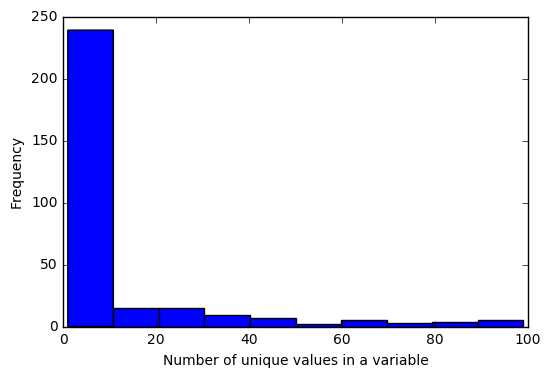

In [19]:
plt.hist(var_uniq[var_uniq<100])
plt.xlabel('Number of unique values in a variable')
plt.ylabel('Frequency')
plt.show()

It looks like there are about 65% of the features with less than 10 unique values. Let's take a closer look at variables with 10 unique values or less.

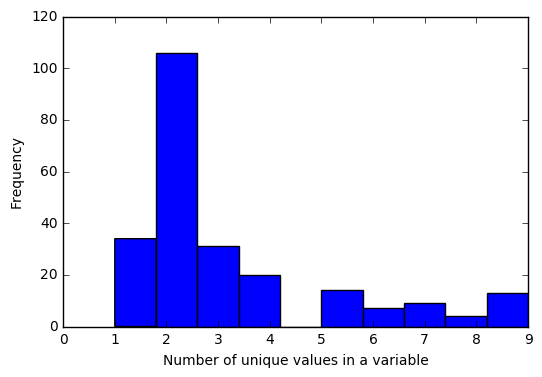

In [20]:
plt.hist(var_uniq[var_uniq<10])
plt.xlabel('Number of unique values in a variable')
plt.ylabel('Frequency')
plt.show()

In [27]:
# print out the unique values of variables that had only 2 unique values
train_raw.loc[:,var_uniq==2].apply(lambda x: print(np.unique(x)), axis= 0)

[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.000

ind_var1_0                       None
ind_var1                         None
ind_var5_0                       None
ind_var5                         None
ind_var6_0                       None
ind_var6                         None
ind_var8_0                       None
ind_var8                         None
ind_var12_0                      None
ind_var12                        None
ind_var13_0                      None
ind_var13_corto_0                None
ind_var13_corto                  None
ind_var13_largo_0                None
ind_var13_largo                  None
ind_var13_medio_0                None
ind_var13_medio                  None
ind_var13                        None
ind_var14_0                      None
ind_var14                        None
ind_var17_0                      None
ind_var17                        None
ind_var18_0                      None
ind_var18                        None
ind_var19                        None
ind_var20_0                      None
ind_var20   

All those features that have 2 unique values have 0 as one of the two values. Some features had 1 as the other value, but others have ranging from 3 to 145.2, 1200, 12027.15. Those features would have a misleading mean and standard deviation value. Their scale may also misleading our modele results. 
Even if they were indeed continuous variables, they could be converted into dummy variables encoded as {1: having a value of 'X', 0: not having a value of 'x'}.

In [74]:
# print out the unique values of variables that had only 3 unique values
train_raw.loc[:,var_uniq==3].apply(lambda x: print(np.unique(x)), axis= 0)

[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[     0.   11976.6  19531.8]
[     0.   9000.  30000.]
[       0.   300000.  3000000.]
[     0.   11976.6  19531.8]
[     0.  15000.  36000.]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[     0.     1883.22  15691.8 ]
[    0.     276.24  1096.02]
[     0.    45741.48  96781.44]
[ 0.  3.  6.]
[ 0.  1.  2.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[    0.    5586.21  7741.95]
[     0.   9000.  30000.]
[     0.     7293.12  18870.99]


num_var1_0                       None
num_var1                         None
num_var8_0                       None
num_var13_corto_0                None
num_var13_corto                  None
num_var24                        None
num_var33                        None
num_var40_0                      None
num_var44_0                      None
saldo_var6                       None
saldo_var13_medio                None
saldo_var18                      None
saldo_var29                      None
saldo_var34                      None
delta_imp_reemb_var17_1y3        None
delta_imp_trasp_var17_in_1y3     None
delta_imp_trasp_var33_in_1y3     None
delta_num_reemb_var17_1y3        None
delta_num_trasp_var17_in_1y3     None
delta_num_trasp_var33_in_1y3     None
imp_amort_var18_ult1             None
imp_amort_var34_ult1             None
imp_trasp_var17_in_hace3         None
num_aport_var33_ult1             None
num_meses_var29_ult3             None
num_trasp_var17_in_hace3         None
num_trasp_va

In [124]:
# print out the unique values of variables that had only 3 to 10 unique values
temp_3_10 = train_raw.loc[:,(var_uniq>2) & (var_uniq <21)]
for i in range(temp_3_10.shape[1]):
    print(list(temp_3_10.columns)[i], np.unique(temp_3_10.iloc[:,i]))

num_var1_0 [0 3 6]
num_var1 [0 3 6]
num_var4 [0 1 2 3 4 5 6 7]
num_var5_0 [ 0  3  6  9 15]
num_var5 [ 0  3  6  9 15]
num_var8_0 [0 3 6]
num_var12_0 [  0   3   6   9  15 111]
num_var12 [ 0  3  6 15]
num_var13_0 [ 0  3  6  9 12 15 18]
num_var13_corto_0 [0 3 6]
num_var13_corto [0 3 6]
num_var13_largo_0 [ 0  3  6  9 12 15 18]
num_var13_largo [ 0  3  6  9 12 15 18]
num_var13 [ 0  3  6  9 12 15 18]
num_var14_0 [  0   3   6  12 111]
num_var14 [ 0  3  6 12]
num_var17_0 [ 0  3  6  9 12 15 18 21 24 27 36]
num_var17 [ 0  3  6  9 12 15 18 21 27]
num_var24_0 [0 3 6 9]
num_var24 [0 3 6]
num_var26_0 [ 0  3  6  9 12 15 21 27 33]
num_var26 [ 0  3  6  9 12 15 21 27 33]
num_var25_0 [ 0  3  6  9 12 15 21 27 33]
num_var25 [ 0  3  6  9 12 15 21 27 33]
num_op_var40_hace2 [  0   3   6   9  12  15  18  21  24  27  30  42  45  51  54  72  81  96
 117]
num_op_var40_hace3 [ 0  3  6  9 48]
num_var30_0 [  0   3   6   9  12  15  18  21  24  33 114]
num_var30 [ 0  3  6  9 12 15 18 21 33]
num_var31_0 [ 0  3  6  9 12 1

<ul>
<li>It seems that many of those variables are ordered categorical variables, with '99' representing missing values, such as 'var36': [ 0  1  2  3 99]. </li>
<li> Some features are evenly spread but with large values. It is again hard to interpret like
<p>saldo_var18 [      0  300000 3000000]</p>
saldo_var29 [     0.   11976.6  19531.8]</li>
<li>It's much harder to make sense of some vairables with a wide range like 'num_var12_0': [  0   3   6   9  15 111]. And it's unclear whether '111' was an outlier or not</li>
<li> Quite a few of the 'delta' variables have values like 'delta_imp_reemb_var17_1y3': [        -1          0 9999999999]</li>
<li>The relationships between variables with almost the same name but different ending could be very important. <p>For instance, </p>
     num_var13_0: [ 0  3  6  9 12 15 18]
     <p>num_var13_corto_0: [0 3 6]</p>
     <p>num_var13_corto: [0 3 6]</p>
     <p>num_var13_largo_0: [ 0  3  6  9 12 15 18]</p>
     <p>num_var13_largo: [ 0  3  6  9 12 15 18]</p>
    <p></p>
</li>
<li> It could be that the features with '_0' have more values than the ones without, like <p>num_var17_0: [ 0  3  6  9 12 15 18 21 24 27 36]</p>
num_var17: [ 0  3  6  9 12 15 18 21 27]
<p> num_var33_0: [ 0  3  6 12]</p>
num_var33: [0 3 6]
</ul>

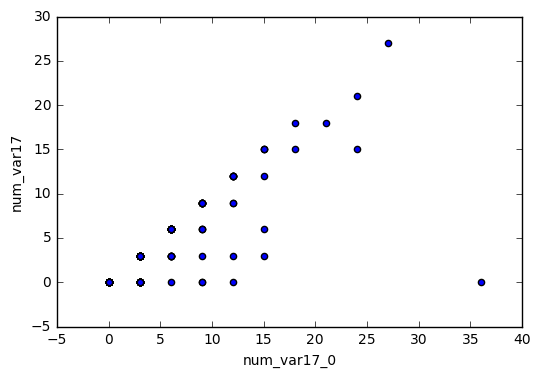

In [77]:
plt.scatter(train_raw.num_var17_0, train_raw.num_var17),
plt.xlabel('num_var17_0')
plt.ylabel('num_var17')
plt.show()

In [80]:
train_raw.groupby(['num_var17_0','num_var17']).size()
# compare the diffrences of two features

num_var17_0  num_var17
0            0            75883
3            0               22
             3               46
6            0                1
             3                6
             6               24
9            0                2
             3                1
             6                3
             9                9
12           0                1
             3                1
             9                2
             12               6
15           3                1
             6                1
             12               1
             15               3
18           15               1
             18               1
21           18               1
24           15               1
             21               1
27           27               1
36           0                1
dtype: int64

According to the scatter plot above, it seems that even though those two variables are highly correlated, there are still many observations with different values.
And the table shows that the vast majority of observations have "0" in both two features.
<p></p>
'0' is the minimum value of most variables. If the vast majority of a variable has zero value, it may be that a survey question asked whether a custom had a certain experience x, and 0 would imply that he/she didn't have it, and the other values would imply a customers' satisfaction level of their experience.

In [12]:
summary.loc['min',var_uniq > 20].sort_values()
# see the minimum value of a "continuous" variable

var3                        -999999.00
saldo_var8                    -4942.26
saldo_var30                   -4942.26
saldo_var42                   -4942.26
saldo_medio_var8_ult1         -3401.34
saldo_var5                    -2895.72
saldo_medio_var8_ult3         -1844.52
saldo_medio_var5_ult1          -922.38
saldo_medio_var5_ult3          -476.07
saldo_medio_var8_hace2         -287.67
saldo_medio_var5_hace2         -128.37
saldo_medio_var5_hace3           -8.04
delta_imp_aport_var13_1y3        -1.00
saldo_var1                       -0.90
saldo_var40                      -0.90
saldo_medio_var17_hace2          -0.03
num_var43_emit_ult1               0.00
num_var43_recib_ult1              0.00
num_op_var39_efect_ult1           0.00
num_op_var39_efect_ult3           0.00
imp_var7_recib_ult1               0.00
num_op_var41_efect_ult1           0.00
num_op_var41_comer_ult3           0.00
num_op_var40_comer_ult3           0.00
num_op_var40_comer_ult1           0.00
num_op_var39_comer_ult3  

It seems that the vast majority of predictor variables have "0" as the mean value. However, it is unknown what 0 means and also what positive or negative vlaues mean.

In [17]:
train_raw.groupby(train_raw.saldo_var8).size()
# it seems that the values are highly spread and bimodal

saldo_var8
-4942.26          1
-2994.93          1
-1802.01          1
-1774.80          1
-843.39           1
-798.48           1
-325.41           1
-306.57           1
-234.81           1
-95.70            1
-80.37            1
-72.81            1
-31.77            1
-30.96            1
-19.05            1
-10.14            1
-9.48             1
-4.17             1
-3.90             1
 0.00         73846
 0.03             2
 0.06             2
 0.18             1
 0.21             1
 0.27             1
 0.33             2
 0.36             1
 0.42             2
 0.60             3
 0.69             1
              ...  
 39851.28         1
 43363.23         1
 44650.17         1
 46519.08         1
 49135.89         1
 49247.82         1
 51013.74         1
 52180.44         1
 54217.92         1
 56959.98         1
 57569.37         1
 58847.37         1
 60098.49         1
 64385.34         1
 65611.32         1
 70501.71         1
 85194.06         1
 89262.00         1
 89381.61

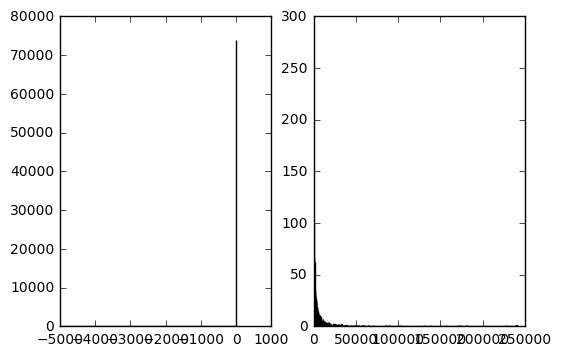

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.hist(train_raw.saldo_var8[train_raw.saldo_var8<10],bins= 2000)
ax2.hist(train_raw.saldo_var8[train_raw.saldo_var8>10],bins= 2000)
plt.show()

In [22]:
train_raw.groupby('num_var43_emit_ult1').size()
# another seemly continuous variable with vast majority of values being zero

num_var43_emit_ult1
0      70958
3       2984
6       1071
9        457
12       223
15       108
18        66
21        45
24        24
27        22
30         9
33        16
36         7
39         3
42         5
45         6
48         1
51         3
54         1
57         2
60         3
66         1
69         1
75         1
84         1
102        1
180        1
dtype: int64

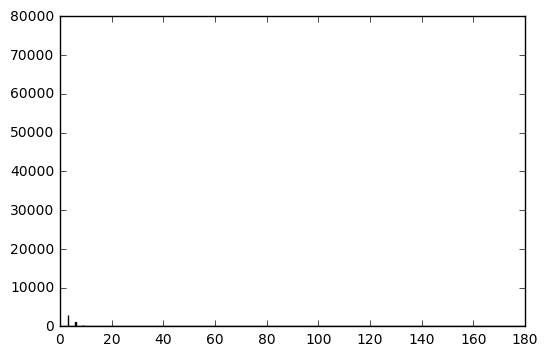

In [21]:
plt.hist(train_raw.num_var43_emit_ult1,bins=2000)
plt.show()

In [27]:
# compute the number of zeros in all numeric variables
(train_raw == 0).astype(int).sum(axis=0)[var_uniq > 20].sort_values()

ID                             0
var15                          0
var38                          0
var3                          75
saldo_var30                20310
saldo_var42                21786
saldo_medio_var5_hace2     23241
saldo_medio_var5_ult3      24664
saldo_medio_var5_ult1      24664
saldo_var5                 25561
saldo_medio_var5_hace3     29637
num_var45_ult3             38356
num_var45_hace2            48881
num_var22_ult3             49954
num_var45_hace3            50663
num_med_var45_ult3         51408
num_var45_ult1             54392
num_var22_hace2            60541
num_op_var39_ult3          62244
num_op_var41_ult3          62355
imp_op_var39_ult1          64271
num_op_var39_ult1          64271
num_op_var39_comer_ult3    64330
imp_op_var39_comer_ult3    64330
num_op_var41_ult1          64388
imp_op_var41_ult1          64388
imp_op_var41_comer_ult3    64480
num_op_var41_comer_ult3    64480
imp_op_var39_comer_ult1    66075
num_op_var39_comer_ult1    66075
          

Only three varaibles have a relatively small number of "0", and the rest of the features have 20K+ or over 26% of observations being zero. And the remaining 100 of those numerical predictor variables (> 20 unique values) have 60K+ observations with zero values, which is 79% of the sample size.

### Replace missing values with np.nan

In [37]:
# see the unique values of var3 
# double check that -999999 represents missing values

sorted(train_raw.var3.unique())


[-999999,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 79,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 156,
 157,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,


In [38]:
# generate a copy of the origianl dataset and make changes
muted = train_raw.copy()
muted.var3 = muted.var3.replace(-999999, np.nan)

muted.var36 = muted.var36.replace(99, np.nan)

In [39]:
muted = muted.set_index(["ID"]) # set the ID column as row name
muted = muted.drop('TARGET', axis = 1)
muted.iloc[:3,-3:]

,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,
1,0.0,0.0,39205.17
3,0.0,0.0,49278.03
4,0.0,0.0,67333.77


### Reshape 'categorical variables' into binary formats and scale numeric variables


In [40]:
for field in list(muted.columns):
    
    n_uniq = np.unique(muted[field]).size # get the number of unique values
    if n_uniq == 1:
        muted = muted.drop(field,axis = 1) # drop fields with only 1 unique value,m,,,,,,
     
    if n_uniq > 2 and n_uniq <21:
        # consider the column as a categorical variable
        muted = pd.concat([muted, 
                           pd.get_dummies(muted[field], prefix=field).iloc[:,:-1]], 
                          axis=1)
        muted = muted.drop(field, axis=1) # remove the original feature
    print(field, ': ', n_uniq)
    # Standarize numerical features
    #if n_uniq >= 21:
    #    mean, std = muted[field].mean(), muted[field].std()
    #    muted.loc[:,field] = (muted[field]-mean)/std
        # normalize feature to Normal(0,1)

var3 :  323
var15 :  100
imp_ent_var16_ult1 :  596
imp_op_var39_comer_ult1 :  7551
imp_op_var39_comer_ult3 :  9099
imp_op_var40_comer_ult1 :  293
imp_op_var40_comer_ult3 :  346
imp_op_var40_efect_ult1 :  23
imp_op_var40_efect_ult3 :  29
imp_op_var40_ult1 :  224
imp_op_var41_comer_ult1 :  7421
imp_op_var41_comer_ult3 :  8961
imp_op_var41_efect_ult1 :  331
imp_op_var41_efect_ult3 :  454
imp_op_var41_ult1 :  8032
imp_op_var39_efect_ult1 :  336
imp_op_var39_efect_ult3 :  462
imp_op_var39_ult1 :  8149
imp_sal_var16_ult1 :  66
ind_var1_0 :  2
ind_var1 :  2
ind_var2_0 :  1
ind_var2 :  1
ind_var5_0 :  2
ind_var5 :  2
ind_var6_0 :  2
ind_var6 :  2
ind_var8_0 :  2
ind_var8 :  2
ind_var12_0 :  2
ind_var12 :  2
ind_var13_0 :  2
ind_var13_corto_0 :  2
ind_var13_corto :  2
ind_var13_largo_0 :  2
ind_var13_largo :  2
ind_var13_medio_0 :  2
ind_var13_medio :  2
ind_var13 :  2
ind_var14_0 :  2
ind_var14 :  2
ind_var17_0 :  2
ind_var17 :  2
ind_var18_0 :  2
ind_var18 :  2
ind_var19 :  2
ind_var20_0 :  2

In [41]:
muted.shape

(76020, 850)

In [110]:
muted.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var29_hace2_4838.7', 'saldo_medio_var29_hace2_10430.01',
       'saldo_medio_var29_ult1_0.0', 'saldo_medio_var29_ult1_2142.87',
       'saldo_medio_var29_ult1_3365.46', 'saldo_medio_var29_ult1_13793.67',
       'saldo_medio_var29_ult3_0.0', 'saldo_medio_var29_ult3_3365.46',
       'saldo_medio_var29_ult3_3490.8', 'saldo_medio_var29_ult3_7331.34'],
      dtype='object', length=963)

In [45]:
muted.to_csv('/Users/yizhao/Documents/Second_capstone/muted_data.csv',header=True)

In [112]:
import seaborn as sns

# assess linear relationship among numeric predictor variables
corr_matrix = train_raw.loc[:,var_uniq > 20].corr()


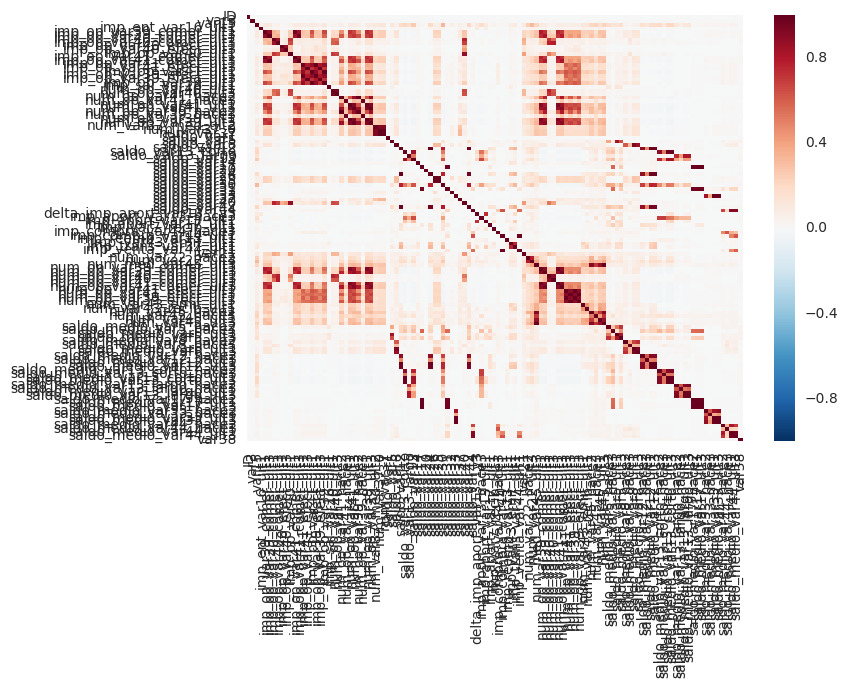

In [113]:
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)
plt.show()

It seems that there are clusters of variables that are highly correlated with each other, especially the ones with highly similar names, such as the ones starting with "imp_" and those starting with "num_"

### Feature selection
Run logistic regression using each individual feature and rank the result.

In [3]:

muted = pd.read_csv('/Users/yizhao/Documents/Second_capstone/muted_data.csv')

In [5]:
no_null = muted.dropna()

print(no_null.shape)

(45908, 964)


In [46]:
less_ft = muted.dropna(axis=1)

print(less_ft.shape)

(76020, 848)


In [16]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation #StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import model_selection # StratifiedKFold

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from pandas_ml import ConfusionMatrix

### Construct a benchmark null model

In [14]:
rand_index = np.random.randint(less_ft.shape[0], size = less_ft.shape[0])
randomized = less_ft.iloc[rand_index,:] # randomized data frame

#### Construct a pipeline from feature selection to logistic regression
--> Also optimize the choice of K best features

In [35]:
pipeline = Pipeline([
    ('minmax', MinMaxScaler()),
    ('kBest', SelectKBest(chi2, k = 100)),
    
    #('pca', PCA()),
    #('LG', LogisticRegression())
    #('RF', RandomForestClassifier(n_estimators = 100)),
    ('svm', SVC())
])
parameters = {
    #'kBest__k':(10,50,100,200,500),
    #'pca__n_components':(10,20,40),
    #'LG__C':(0.1,1,10,100)
    'svm__C':(0.1,1,10,100)
}

In [36]:

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, 
                           scoring= metrics.make_scorer(metrics.accuracy_score))
#metrics.f1_score

grid_search.fit(less_ft, train_raw.TARGET) # the last column is the target

best_parameters = grid_search.best_estimator_.get_params()
print( best_parameters)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Process ForkPoolWorker-9:
Process ForkPoolWorker-12:
Process ForkPoolWorker-10:
Process ForkPoolWorker-11:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/yizhao/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/yizhao/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):


KeyboardInterrupt: 

In [47]:
seed = 1
kfold = cross_validation.StratifiedKFold(train_raw.TARGET, 
                                         n_folds=5, 
                                         random_state=seed) 

In [51]:
pipe_LG = Pipeline([
    ('minmax', MinMaxScaler()),
    ('kBest', SelectKBest(chi2, k = 100)),
    ('LG', LogisticRegression(C=0.1)) # SGDclassifier 
])

results = cross_val_score(pipe_LG,  # run on the pipeline
                          less_ft, train_raw.TARGET,  # review texts and sales rank
                          cv=kfold,  
                          scoring = metrics.make_scorer(metrics.f1_score))
print('chi2 top 100 feature Logistic Regression\n mean f1_score score: \n',
      results.mean())

/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


chi2 top 100 feature Logistic Regression
 mean f1_score score: 
 0.000663349917081


/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
pipe_svm = Pipeline([
    ('minmax', MinMaxScaler()),
    ('kBest', SelectKBest(chi2, k = 100)),
    ('svm', SVC(C=0.1)) # SGDclassifier 
])

results = cross_val_score(pipe_svm,  # run on the pipeline
                          less_ft, train_raw.TARGET,  # review texts and sales rank
                          cv=kfold,  
                          scoring = metrics.make_scorer(metrics.f1_score))
print('chi2 top 100 feature SVM\n mean f1_score score: \n',
      results.mean())

/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


chi2 top 100 feature SVM
 mean f1_score score: 
 0.0


/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
y = train_raw.TARGET.values.ravel()
results = cross_val_score(XGBClassifier(max_depth=5),  
                          less_ft, y,  
                          cv=kfold,  
                          scoring = metrics.make_scorer(metrics.f1_score))
print('XGBoost Classifier\n mean f1_score score: \n',
      results.mean())

XGBoost Classifier
 mean f1_score score: 
 0.00791545535311


In [43]:
# use the original raw data set
X = train_raw.drop('TARGET', axis= 1)
X = X.drop('ID', axis = 1)
y = train_raw[['TARGET']].values.ravel()

In [44]:
# use no feature transformation
results = cross_val_score(RandomForestClassifier(n_estimators=100),  
                          X, y,  
                          cv=kfold,  
                          scoring = metrics.make_scorer(metrics.f1_score))
print('Original Dataset RandomForest Classifier\n mean f1_score score: \n',
      results.mean())

Original Dataset RandomForest Classifier
 mean f1_score score: 
 0.0825087158589


In [50]:
# compare with using our processed feature space
results = cross_val_score(RandomForestClassifier(n_estimators=100),  
                          less_ft, y,  
                          cv=kfold,  
                          scoring = metrics.make_scorer(metrics.f1_score))
print('RandomForest Classifier\n mean f1_score score: \n',
      results.mean())

RandomForest Classifier
 mean f1_score score: 
 0.0752049579507


In [36]:
results = cross_val_score(RandomForestClassifier(n_estimators=100),  
                          randomized, y,  
                          cv=kfold,  
                          scoring = metrics.make_scorer(metrics.f1_score))
print('Benchmark RandomForest Classifier\n mean f1_score score: \n',
      results.mean())

Benchmark RandomForest Classifier
 mean f1_score score: 
 0.0256098332312


In [46]:
y.size

76020

In [52]:
X = less_ft
y = train_raw.TARGET.values.ravel()

for train_index, test_index in kfold:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X.iloc[train_index, :]
    X_test = X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    pipe_LG.fit(X_train, y_train)
    
    print(metrics.f1_score(y_pred= pipe_LG.predict(X_test), 
                           y_true= y_test), '\n')

TRAIN: [14884 14940 14977 ..., 76017 76018 76019] TEST: [    0     1     2 ..., 15210 15211 15212]


/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0 

TRAIN: [    0     1     2 ..., 76017 76018 76019] TEST: [14884 14940 14977 ..., 30427 30428 30429]
0.00331674958541 

TRAIN: [    0     1     2 ..., 76017 76018 76019] TEST: [29772 29889 29968 ..., 46633 46656 46658]


/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0 

TRAIN: [    0     1     2 ..., 76017 76018 76019] TEST: [45569 45570 45571 ..., 62127 62134 62165]
0.0 

TRAIN: [    0     1     2 ..., 62127 62134 62165] TEST: [60755 60756 60757 ..., 76017 76018 76019]
0.0 



/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Run benchmarking null model for logistic regression

In [18]:
y = train_raw[['TARGET']].values.ravel()

Xlr, Xtestlr, y_lr, y_testlr = train_test_split(randomized, 
                                                y,
                                                random_state=5)

scale = MinMaxScaler()
X_train = scale.fit_transform(Xlr) # scale all predictor variables
X_test = scale.fit_transform(Xtestlr)

LG = LogisticRegression(C=0.1)
LG.fit(X_train, y_lr)

pred_train = LG.predict(X_train)
pred_test = LG.predict(X_test)

ConfusionMatrix(y_true = y_testlr, y_pred = pred_test)


Predicted      0  1  __all__
Actual                      
0          18300  0    18300
1            705  0      705
__all__    19005  0    19005

In [19]:
ConfusionMatrix(y_true = y_lr, y_pred = pred_train)

Predicted      0  1  __all__
Actual                      
0          54712  0    54712
1           2303  0     2303
__all__    57015  0    57015

* Thus, in completely random scenario, all observations are predicted to be satisfied customers (TARGET = 0)
#### Run model on actual data

In [53]:
Xlr, Xtestlr, y_lr, y_testlr = train_test_split(less_ft, 
                                                y,
                                                random_state=5)

scale = MinMaxScaler()
X_train = scale.fit_transform(Xlr) # scale all predictor variables
X_test = scale.fit_transform(Xtestlr)

In [54]:

get_kbest = SelectKBest(chi2, k = 100) # use Chi2 to select best features
get_kbest.fit(X_train, y_lr)
X_top = get_kbest.transform(X_train)

LG = LogisticRegression(C=0.1)
LG.fit(X_top, y_lr)

pred_train = LG.predict(X_top)
pred_test = LG.predict(get_kbest.transform(X_test))

print('Training set:', metrics.f1_score(y_pred= pred_train, 
                           y_true= y_lr), '\n')
print('Testing set:', 
      metrics.f1_score(y_pred= pred_test, 
                           y_true= y_testlr))

Training set: 0.000867302688638 

Testing set: 0.0


In [55]:
ConfusionMatrix(y_true = y_lr, y_pred = pred_train)

Predicted      0  1  __all__
Actual                      
0          54710  2    54712
1           2302  1     2303
__all__    57012  3    57015

In [32]:
print('True positive: ', sum(pred_train * y_lr ==1))

print('\nTrue negative: ',sum(pred_train + y_lr ==0) )
print('\nFalse negative: ',sum(y_lr ==1))
print('\nFalse positive: ', sum(pred_train + y_lr ==1) - sum(y_lr== 1))

True positive:  0

True negative:  54711

False negative 2303

False positive:  1


In [56]:
train_prob = LG.predict_proba(X_top)
print(train_prob[:5])

[[ 0.98576023  0.01423977]
 [ 0.93531325  0.06468675]
 [ 0.98052752  0.01947248]
 [ 0.98043494  0.01956506]
 [ 0.98566426  0.01433574]]


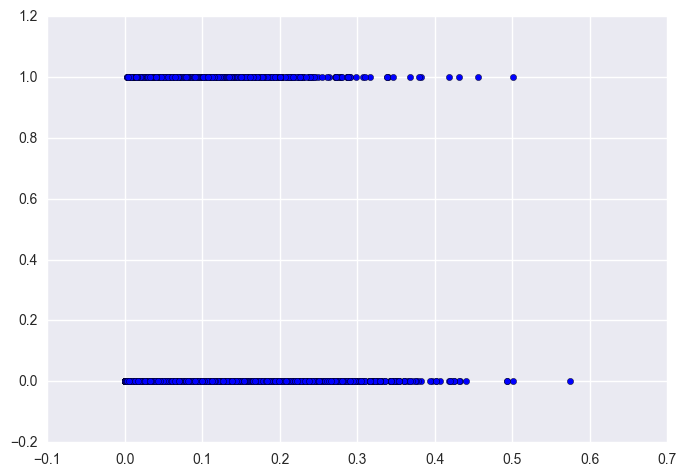

In [57]:
plt.scatter(x = train_prob[:,1], y = y_lr)
plt.show()

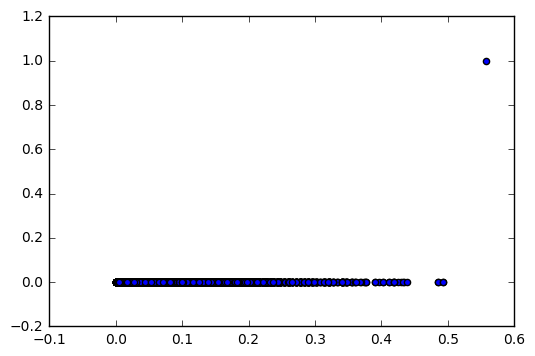

In [77]:
plt.scatter(x = train_prob[:,1], y = pred_train)
plt.show()

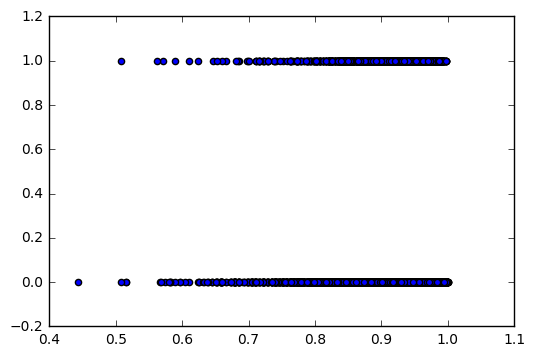

In [78]:
plt.scatter(x = train_prob[:,0], y = y_lr)
plt.show()

In [25]:
# remake the confusion matrix using differences in probability
ConfusionMatrix(y_true = y_lr, 
                         y_pred = train_prob[:,1]>0.05)

Predicted  False   True  __all__
Actual                          
0          38915  15797    54712
1            717   1586     2303
__all__    39632  17383    57015

In [93]:
metrics.f1_score( y_true = y_lr, 
                         y_pred = train_prob[:,1]>0.08)

0.24835756596661282

In [26]:
# remake the confusion matrix using differences in probability
ConfusionMatrix(y_true = y_lr, 
                         y_pred = train_prob[:,1]>0.08)

Predicted  False  True  __all__
Actual                         
0          48883  5829    54712
1           1150  1153     2303
__all__    50033  6982    57015

* Lowering the probability of identifying as 'true' significantly increased the number of true positives
* This also increased the number of false negatives at significantly higher rate. The increase in false negative observations is five times as much as the increase in true positives. 

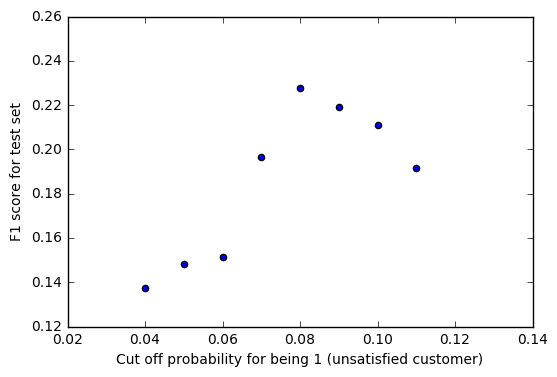

In [96]:
prob_test = LG.predict_proba(get_kbest.transform(X_test))

cut_off = np.arange(0.04,0.12,0.01)
f1_test = [metrics.f1_score(y_pred= prob_test[:,1]>x, 
                            y_true = y_testlr) for x in cut_off]
plt.scatter(cut_off, f1_test)
plt.xlabel('Cut off probability for being 1 (unsatisfied customer)')
plt.ylabel('F1 score for test set')
plt.show()

* The optimal probability threshold for maximizing the F-1 score appears to be 0.08. 

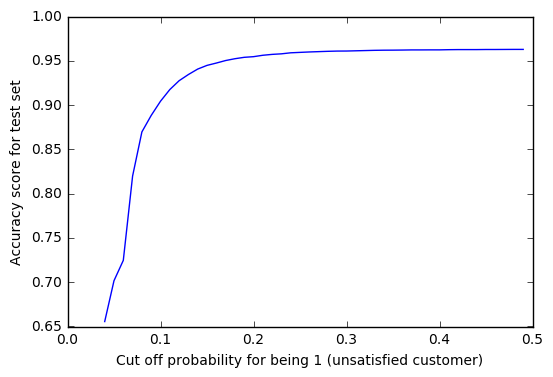

In [97]:
cut_off = np.arange(0.04,0.5,0.01)
f1_test = [metrics.accuracy_score(y_pred= prob_test[:,1]>x, 
                            y_true = y_testlr) for x in cut_off]
plt.plot(cut_off, f1_test)
plt.xlabel('Cut off probability for being 1 (unsatisfied customer)')
plt.ylabel('Accuracy score for test set')
plt.show()

* The accuracy score is the highest at 0.5 probability cutoff of the logistic regression predicted probabilities.
* However, the interest of this study is to accuratly identifying the unsatisfied customers, not predicting the satisfied customers with greater accuracy. Thus, the F1 score is a preferrable metric of assessing our model performance. 

In [108]:
svm= SVC(C=0.1,probability=True)
svm.fit(X_top, y_lr)

prob_train = svm.predict_proba(X_top)
X_test = scale.fit_transform(Xtestlr)
prob_test = svm.predict_proba(get_kbest.transform(X_test))


In [109]:
print("prob_train:",prob_train.shape)
print("pred_train:",pred_train.size)
print("pred_test:", pred_test.size)
print('X_testlr:', Xtestlr.shape)
print(prob_test.shape, y_testlr.size)

prob_train: (57015, 2)
pred_train: 57015
pred_test: 19005
X_testlr: (19005, 962)
(19005, 2) 19005


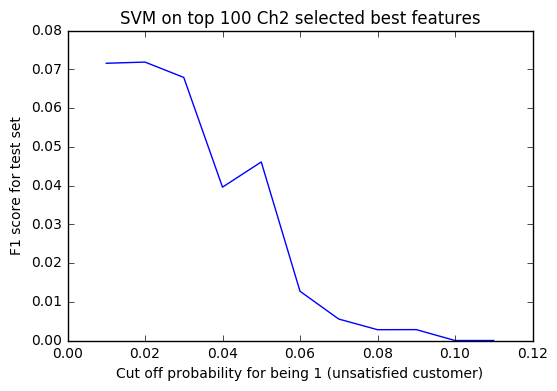

In [112]:
cut_off = np.arange(0.01,0.12,0.01)
f1_test = [metrics.f1_score(y_pred= prob_test[:,1]>x, 
                            y_true = y_testlr) for x in cut_off]
plt.plot(cut_off, f1_test)
plt.title('SVM on top 100 Ch2 selected best features')
plt.xlabel('Cut off probability for being 1 (unsatisfied customer)')
plt.ylabel('F1 score for test set')
plt.show()

In [27]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [28]:
b_NB = BernoulliNB()
b_NB.fit(X_top, y_lr)

prob_train = b_NB.predict_proba(X_top)
prob_test = b_NB.predict_proba(get_kbest.transform(X_test))

In [136]:
prob_test[:5], y_testlr[:5]

(array([[  9.99988971e-01,   1.10287666e-05],
        [  1.00000000e+00,   9.40473380e-14],
        [  3.84441657e-06,   9.99996156e-01],
        [  9.99955143e-01,   4.48573320e-05],
        [  1.43372126e-04,   9.99856628e-01]]),        TARGET
 63739       0
 39079       0
 27589       1
 14520       0
 9787        0)

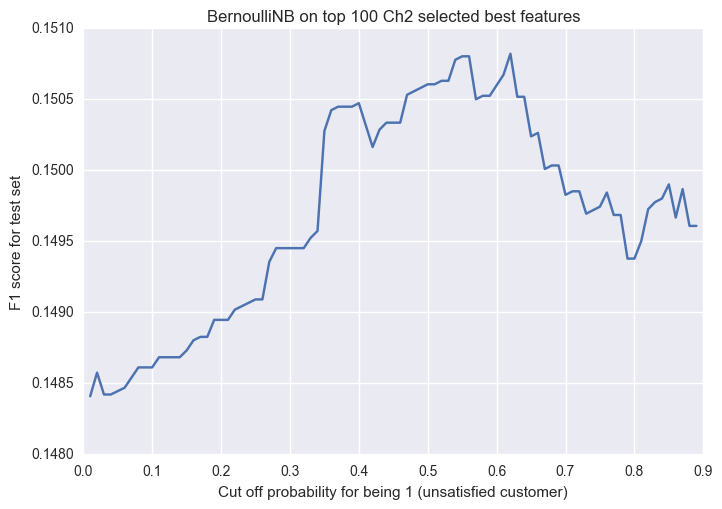

In [29]:
cut_off = np.arange(0.01,0.9,0.01)
f1_test = [metrics.f1_score(y_pred= prob_test[:,1]>x, 
                            y_true = y_testlr) for x in cut_off]
plt.plot(cut_off, f1_test)
plt.title('BernoulliNB on top 100 Ch2 selected best features')
plt.xlabel('Cut off probability for being 1 (unsatisfied customer)')
plt.ylabel('F1 score for test set')
plt.show()

In [31]:
ConfusionMatrix(y_pred= prob_test[:,1]>0.55, 
                            y_true = y_testlr)

Predicted  False  True  __all__
Actual                         
0          13352  4948    18300
1            244   461      705
__all__    13596  5409    19005

In [139]:
g_NB = GaussianNB()
g_NB.fit(X_top, y_lr)

prob_train =g_NB.predict_proba(X_top)
prob_test = g_NB.predict_proba(get_kbest.transform(X_test))

/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


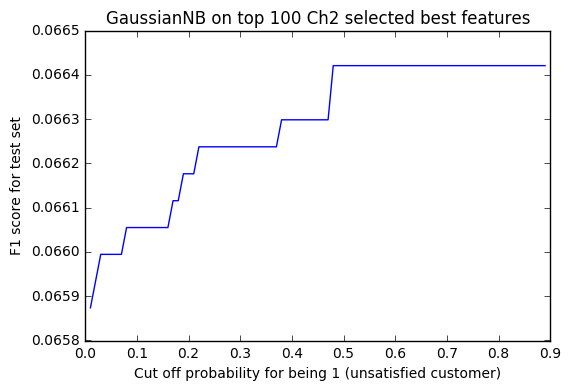

In [141]:
cut_off = np.arange(0.01,0.9,0.01)
f1_test = [metrics.f1_score(y_pred= prob_test[:,1]>x, 
                            y_true = y_testlr) for x in cut_off]
plt.plot(cut_off, f1_test)
plt.title('GaussianNB on top 100 Ch2 selected best features')
plt.xlabel('Cut off probability for being 1 (unsatisfied customer)')
plt.ylabel('F1 score for test set')
plt.show()

Bernouli was performing significantly better than the Gaussian Naive Bayes method.
<p>This is likely because most of the predictive features are in the form of bianry variables already. Even if the variables are numeric, they are highly sparse with the majority being zero. They definitely do not fit into the assumption of having Gaussian distributions. 

### Use Principal Component analysis to further reduce features


(848, 848)
(76020, 848)


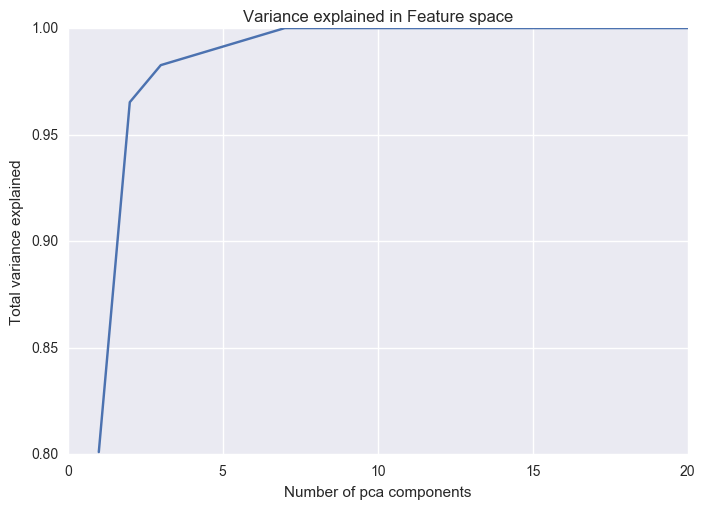

In [71]:
# first try the default number of components in PCA
X = less_ft
pca_default = PCA()
pca_fit = pca_default.fit(X)

pca_data = pca_default.transform(X)
print(pca_fit.components_.shape)
print(pca_data.shape)

# plot the amount of variance explained by having each additinal component
plt.plot(range(1, 21), 
         pca_default.explained_variance_ratio_.cumsum()[:20])
plt.xlabel('Number of pca components')
plt.ylabel('Total variance explained')
plt.title('Variance explained in Feature space')
plt.show()

* It seems that 5 Principle Components are sufficient to explain the amount of variation in the features

In [72]:
pca = PCA(n_components= 5)

X = pca.fit_transform(less_ft)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= seed)

LG = LogisticRegression(C=0.1)
LG.fit(X_train, y_train)

pred_train = LG.predict(X_train)
pred_test = LG.predict(X_test)

ConfusionMatrix(y_true = y_test, y_pred = pred_test)

Predicted   0      1  __all__
Actual                       
0          98  18160    18258
1           1    746      747
__all__    99  18906    19005

In [74]:
ConfusionMatrix(y_true = y_train, y_pred = pred_train)

Predicted    0      1  __all__
Actual                        
0          298  54456    54754
1            6   2255     2261
__all__    304  56711    57015

-- PCA did not lead to any satisfactory result
* It seems that linear transformation did not lead to good results with our highly sparse dataset
* There is a significantly higher True Positive rate, but the instances of false negative are 25 times as much as the True positive.



### Deep Learning using Keras


In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout, Activation
import tensorflow

Using TensorFlow backend.


In [34]:
X = less_ft.values
Y = train_raw.TARGET.values.ravel()
seed = 1
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])#, 'fmeasure', 'precision', 'recall'

    return model

# create model
model = KerasClassifier(build_fn = create_model, 
                        epochs=150, 
                        batch_size=10, verbose=0)
# evaluate using 10-fold cross validation
kfold = model_selection.StratifiedKFold(n_splits=10, 
                                        shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

UnboundLocalError: local variable 'targets' referenced before assignment